In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
y = df['label']
x = df.drop(columns= {'label'})

In [8]:
y.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: >

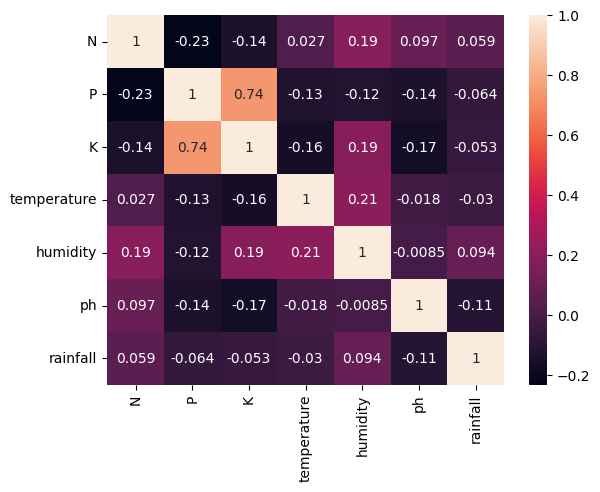

In [9]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [12]:
pred_train_rf = rf.predict(X_train)
print('Accuracy:', accuracy_score(y_train,pred_train_rf))

Accuracy: 1.0


In [13]:
print('Accuracy:', accuracy_score(y_test,pred_rf))



Accuracy: 0.9931818181818182


In [14]:
import pickle
pickle.dump(rf,open('model.pkl', 'wb'))

In [16]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [15]:
y_test

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
           ...    
59            rice
71            rice
1908        cotton
1958        cotton
482     pigeonpeas
Name: label, Length: 440, dtype: object